In [1]:
import numpy as np
from scipy.stats import entropy

import matplotlib.pyplot as plt
%matplotlib inline

# 2d D_KL reparameterization

In [8]:
cov = np.array([[.1, -.05], [-.05, .1]])
mean = -np.diag(cov) / 2.
n_samples = 10000000
bins = 100

In [9]:
normal = np.random.multivariate_normal(mean, cov, n_samples)
#minx, miny = norm.min(axis=0)
#maxx, maxy = norm.max(axis=0)
ru = np.array([[-2, 1], [-2, 1]])
re = np.array([[0, 3], [0, 3]])
uniform = np.stack([np.random.uniform(ru[0, 0], ru[0, 1], size=n_samples),
                    np.random.uniform(ru[1, 0], ru[1, 1], size=n_samples)], axis=-1)

lognormal = np.exp(normal)
loguniform = np.exp(uniform)

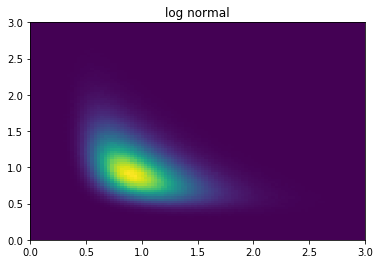

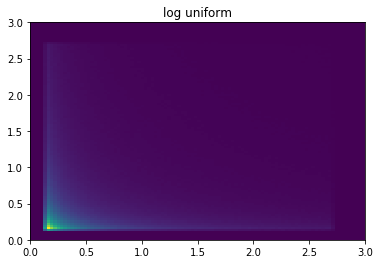

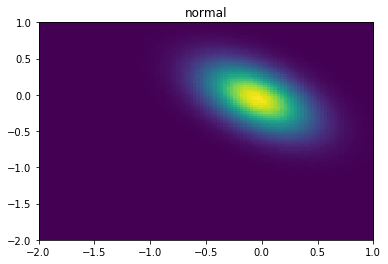

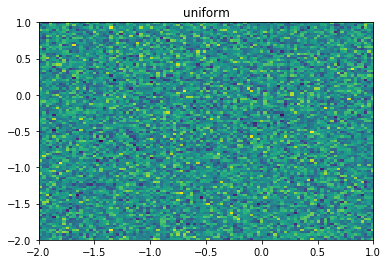

In [10]:
def plot(array, r, bins, title):
    plt.figure()
    counts, _, _, _ = plt.hist2d(array[:, 0], array[:, 1],
                                 range=r, bins=bins)
    plt.title(title)
    return counts

counts_lognormal = plot(lognormal, re, bins, 'log normal')
counts_loguniform = plot(loguniform, re, bins, 'log uniform')

counts_normal = plot(normal, ru, bins, 'normal')
counts_uniform = plot(uniform, ru, bins, 'uniform')

plt.show()

In [11]:
def floor(x):
    x[x==0] = x[x>0].min()/10.
    return x.ravel()

print('log', entropy(floor(counts_lognormal), floor(counts_loguniform)))
print('uniform', entropy(counts_normal.ravel(), counts_uniform.ravel()))

log 1.81182114174
uniform 1.81288886773
